# A-B testing. Comprar unos pies de gato en un e-commerce

In [1]:
from bayes import *

In [2]:
import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

import warnings
warnings.simplefilter('ignore')

plt.rcParams['figure.figsize']=(15, 8)

from scipy.stats import bernoulli, beta 

In [3]:
%pip install mpmath

from mpmath import betainc 

Note: you may need to restart the kernel to use updated packages.


In [4]:
piesdegato=pd.read_excel('CRO.xlsx')

piesdegato.head()

,ID,Version,time
0,1,0,63
1,2,0,52
2,3,0,68
3,4,0,77
4,5,0,62


### Se establece el tiempo de éxito en 60 segundos para finalizar la compra.

In [5]:
def boolean(c):
    
    if c>60:
        
        return False
    
    else:
        
        return True

In [6]:
converted=piesdegato.time.apply(boolean)

converted=converted.tolist()



In [7]:
piesdegato['Success']=converted

In [8]:
pd.crosstab(piesdegato.Version, piesdegato.Success)

Success,False,True
Version,,
0,9,8
1,8,7


#### Datos son conocidos: impresiones, conversiones, control y test.

In [9]:
imps_ctrl, convs_ctrl = 17,8
imps_test, convs_test= 15,7

In [10]:
CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.47058823529411764, Test=0.4666666666666667'

#### Para el APRIORI se crean funciones Beta.

In [11]:
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

#### Diferencia normalizada de las medias de test y control.

In [12]:
beta_control.mean(), beta_test.mean()

(0.47368421052631576, 0.47058823529411764)

In [13]:
x=np.linspace(0, 1, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

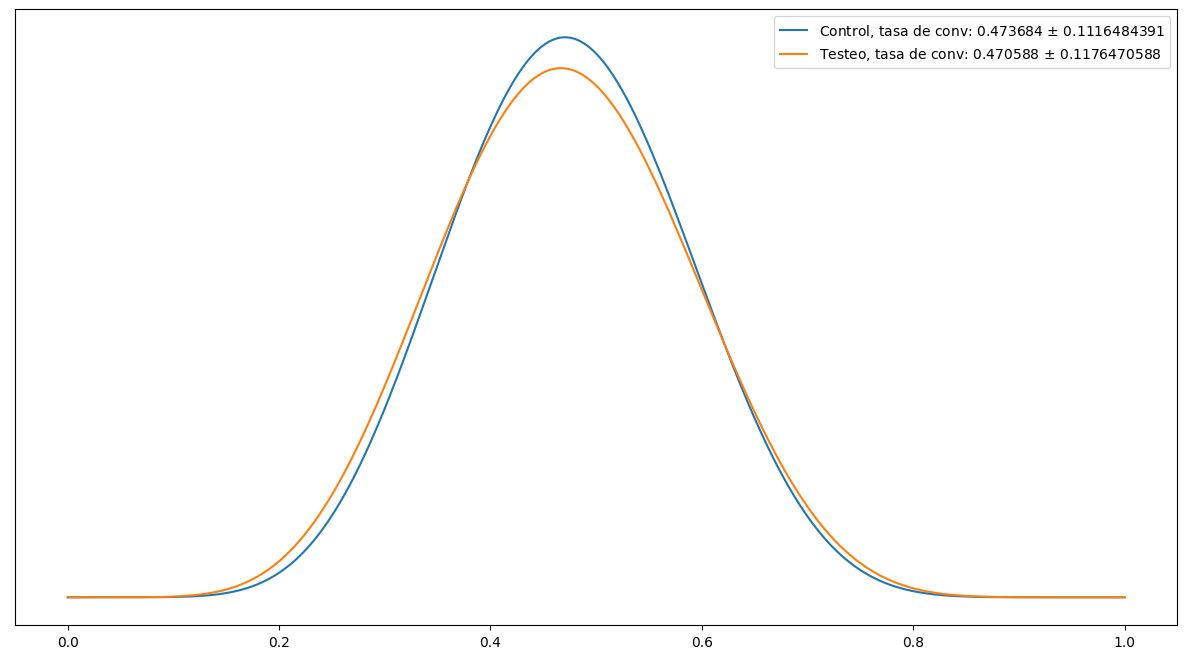

In [14]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [15]:
salto=(beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

-0.006535947712418259

In [16]:
prob=calc_prob(beta_test,beta_control)
prob

0.4921134509146135

### Conclusiones:

In [17]:
print (
'''El test aumenta la tasa de conversión en un {:2.2f}%,
con una probabilidad del {:2.2f}%'''
    .format(salto*100, (1-prob)*100)
)

El test aumenta la tasa de conversión en un -0.65%,
con una probabilidad del 50.79%
